# Data Cleaning

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

## Loading Data

In [2]:
data=pd.read_csv("./data/diabetes.csv")

## Exploring the corpus

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(data.shape)

(768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


    Data seems to have missing values in the form of zeros. 
    Pregnancies and Outcome can make sense but other features cannot be zero

## Data Distribution

<Figure size 432x288 with 0 Axes>

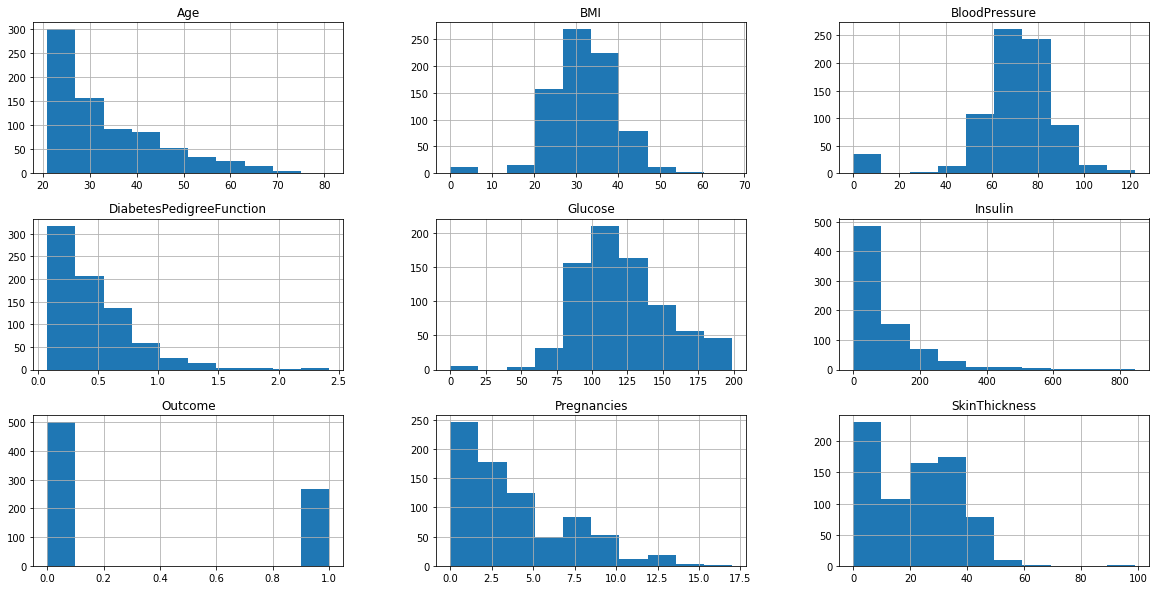

In [7]:
plt.figure()
data.hist(figsize=(20,10))
plt.show()

### Separating the outcome as target

In [8]:
target=data['Outcome'].values

In [9]:
print(target)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Checking Dataset Balancing

In [11]:
def checkCounts(nparr):
    hm=dict()
    for val in nparr:
        val=str(val)
        if val not in hm:
            hm[val]=1
        else:
            hm[val]=hm[val]+1
    return hm

In [12]:
print((checkCounts(target)))

{'1': 268, '0': 500}


In [13]:
def plotCountDist(arr):
    total=arr.shape[0]
    dic=checkCounts(arr)
    plt.figure(figsize=(5,3))
    plt.bar(dic.keys(), dic.values())
    for key in dic.keys():
        plt.text(key,dic[key]/2,dic[key])
    plt.show()
    
    

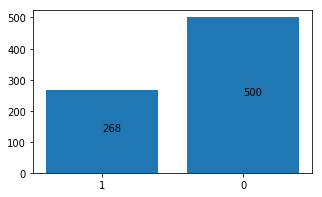

In [14]:
plotCountDist(target)

## Missing Values or Incorrect Values

In [15]:
data.iloc[:,1:8].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [16]:
data_na=data.iloc[:,1:8]

### Incorrect Values are replaced by -1

In [17]:
for col in data_na.columns:
    print(col)
    for j in range(768):
        if data_na[col][j]== 0:
            data_na[col][j]=-1
    

Glucose
BloodPressure


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [18]:
data_na.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,-1,33.6,0.627,50
1,85,66,29,-1,26.6,0.351,31
2,183,64,-1,-1,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [19]:
data_na=pd.concat([data.iloc[:,0], data_na], axis=1)

In [20]:
data_na.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,-1,33.6,0.627,50
1,1,85,66,29,-1,26.6,0.351,31
2,8,183,64,-1,-1,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
null_map=data_na==-1

In [22]:
null_map.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


### Visualization Function for incorrect values mapping with T/F

In [23]:
def showNullDist(null_map):
    plt.figure(figsize=(20,10))
    for col,i in zip(null_map.columns, range(1,9)):
        count=pd.value_counts(null_map[col])
        plt.subplot(2,4,i)
        plt.bar(count.keys(), count.values)
        plt.xticks(range(len(count.keys())), count.keys())
        for key in count.keys():
            plt.text(key,count[key]/2,count[key])

        plt.xlabel(col)
    plt.show()

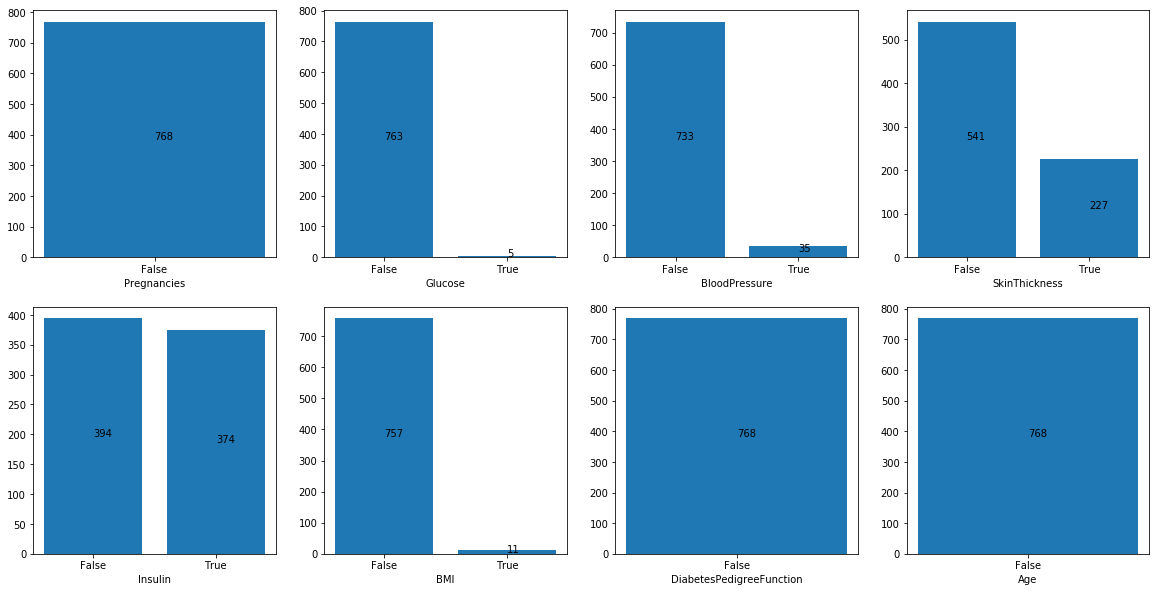

In [24]:
showNullDist(null_map)

    I can impute Blood Pressure, Glucose, BMI

### Computing Means for imputation

In [25]:
means=dict()
for col in data_na.columns:
    sum_0=0
    total_0=0
    sum_1=0
    total_1=0
    for i, t in zip(range(768),target):
        if t==0:
            sum_0=sum_0+data[col][i]
            total_0=total_0+1
        else:
            sum_1=sum_1+data[col][i]
            total_1=total_1+1
            
    if str(col)=='Pregnancies' or str(col)=='Age':
        arr=[int(sum_0/500),int(sum_1/268)]
    else:
        
        arr=[sum_0/500,sum_1/268]
    
    
    
    if col not in means:
        means[str(col)]=arr

In [26]:
means

{'Pregnancies': [3, 4],
 'Glucose': [109.98, 141.25746268656715],
 'BloodPressure': [68.184, 70.82462686567165],
 'SkinThickness': [19.664, 22.16417910447761],
 'Insulin': [68.792, 100.33582089552239],
 'BMI': [30.30419999999996, 35.14253731343278],
 'DiabetesPedigreeFunction': [0.42973400000000017, 0.5505],
 'Age': [31, 37]}

In [27]:
data_na.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,-1,33.6,0.627,50
1,1,85,66,29,-1,26.6,0.351,31
2,8,183,64,-1,-1,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
for col in ['Glucose', 'BloodPressure','BMI']:
    print(col)
    for i in range(768):
        if data_na[col][i]==-1:
            if target[i]==0:
                data_na[col][i]=means[col][0]
            else:
                data_na[col][i]=means[col][1]

Glucose
BloodPressure


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


BMI


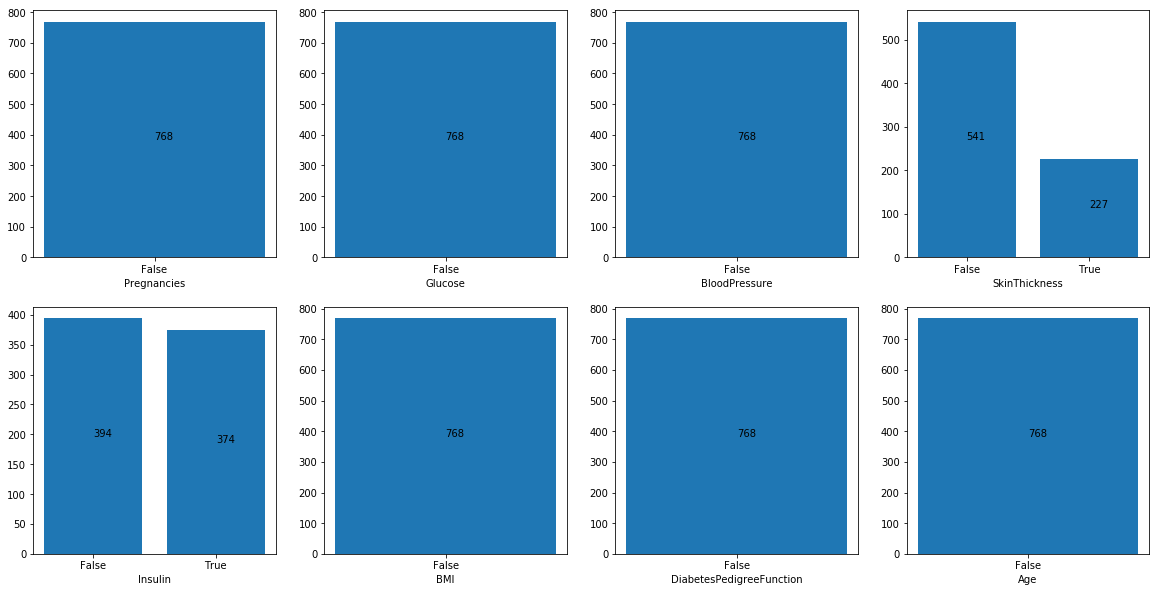

In [29]:
showNullDist(data_na==-1)

    Hence we have successfully imputed glucose, bmi and bp
    Now I will deal with Insulin and Skin Thickness as they are large in number

### Checking Corelation with the outcome

In [30]:
pcorrs=data.iloc[:,[3,4,8]].corr()

In [31]:
pcorrs

,SkinThickness,Insulin,Outcome
SkinThickness,1.000000,0.436783,0.074752
Insulin,0.436783,1.000000,0.130548
Outcome,0.074752,0.130548,1.000000


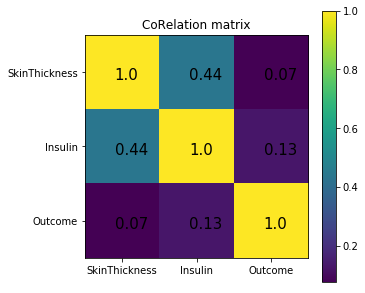

In [32]:
plt.figure(figsize=(5,5))
plt.title("CoRelation matrix")
plt.imshow(pcorrs)
plt.xticks((range(len(pcorrs.columns))), pcorrs.columns)
plt.yticks((range(len(pcorrs.columns))), pcorrs.columns)
for ind in range(3):
    for col in range(3):
        plt.text(col-0.1,ind+0.1,np.around(pcorrs.iloc[ind,col], decimals=2), fontdict={'size':15})
plt.colorbar()
plt.show()

In [33]:
data_not_target=data.iloc[:,:-1]

In [1]:
def plotBivarAnalysis(data, w,h):
    _len=len(data.columns)
    plt.figure(figsize=(w,h))
    plt.title("Bivariate Analysis")
    i=1
    for col1 in data.columns:
        for col2 in data.columns:
            plt.subplot(_len,_len,i)
            plt.scatter(data[col2].values, data[col1].values, c=target, alpha=0.3)
            if i-1%_len==0:
                plt.ylabel(col1)
            if i>(_len*_len)-_len:
                plt.xlabel(col2)
            
            i=i+1
    plt.show()
    

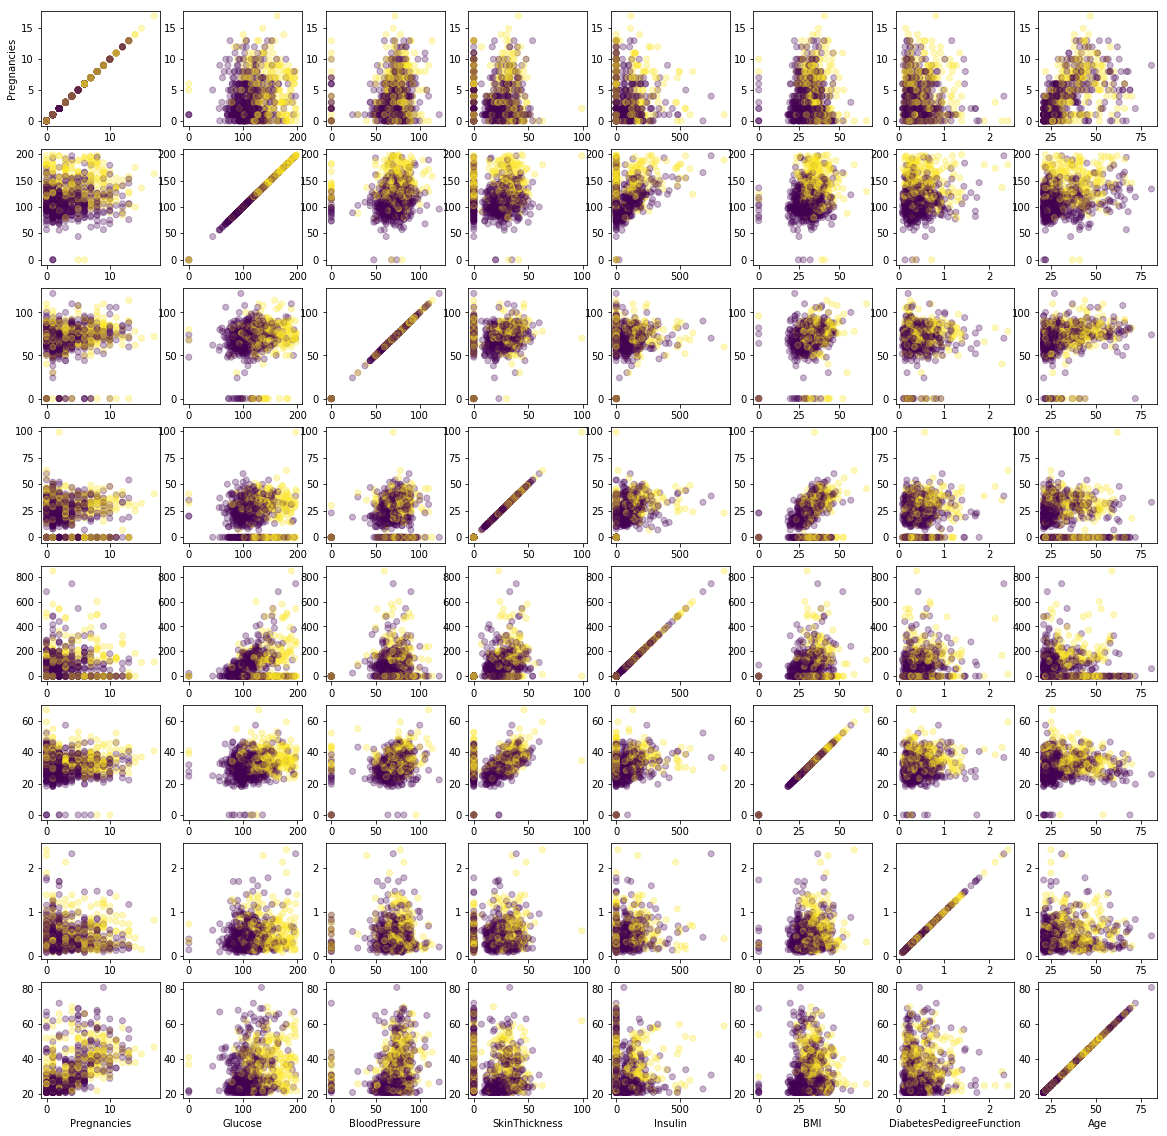

In [35]:
plotBivarAnalysis(data_not_target,20,20)

### It will be okay to drop these features as they are not much Corelated with the outcome

In [38]:
data_dropped=data_na.drop(columns=['SkinThickness','Insulin'])

In [39]:
data_dropped.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33


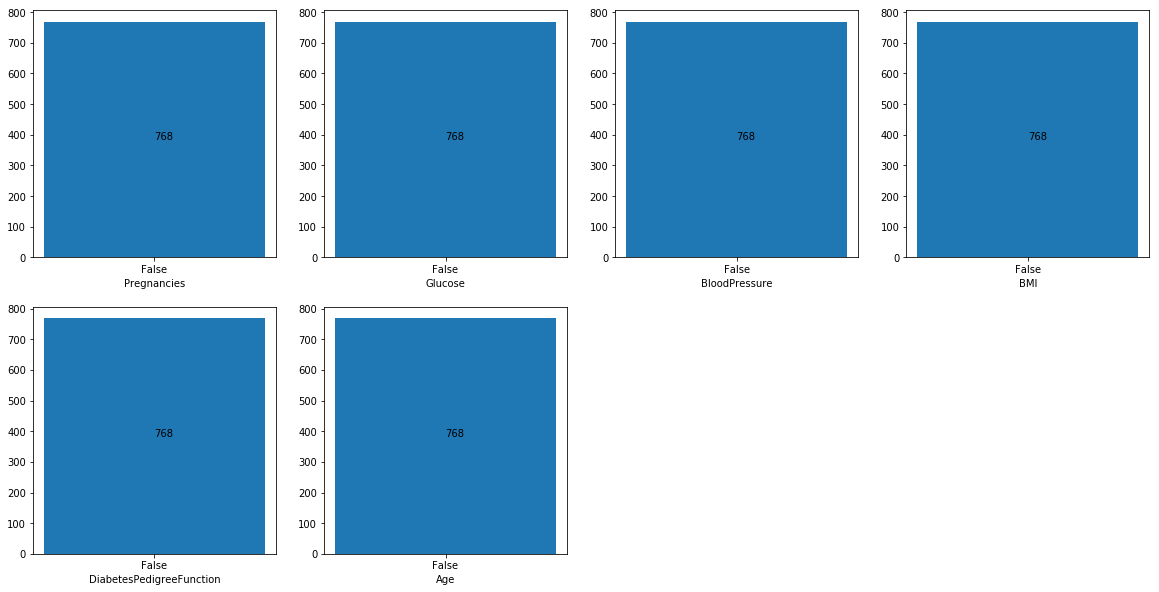

In [44]:
showNullDist(data_dropped==-1)

### Exporting Cleaned Data

In [47]:
data_dict={
    'data':data_dropped,
    'targets':target
}

In [50]:
joblib.dump(data_dict,"./Data/CleanedData.joblib")

['./Data/CleanedData.joblib']

# --------------------------------------------

## Loading Cleaned Data

In [3]:
dataset=joblib.load("./Data/CleanedData.joblib")

In [4]:
dataset.keys()

dict_keys(['data', 'targets'])

In [5]:
data=dataset['data']
target=dataset['targets']

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33


In [7]:
print(target)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [17]:
(pd.concat([data,pd.Series(target, name='Outcome')],axis=1)).to_csv("./Data/cleaned.csv", index=False)

In [14]:
pd.save_csv?

Object `pd.save_csv` not found.
